In [26]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_1970s = pd.read_csv("data/1970_1979_data.csv")
data_1980s = pd.read_csv("data/1980_1989_data.csv")
data_1990s = pd.read_csv("data/1990_1999_data.csv")
data_2000s = pd.read_csv("data/2000_2009_data.csv")
data_2010s = pd.read_csv("data/2010_2019_data.csv")

In [3]:
# Combine the data into one dataframe
weather_df = pd.concat([data_1970s, data_1980s, data_1990s, data_2000s, data_2010s])
weather_df

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
0,1970-01-01,24.0,15.0,0.01,0.40,19.00
1,1970-01-02,19.0,-6.0,0.01,0.10,19.00
2,1970-01-03,10.0,-9.0,T,0.10,19.00
3,1970-01-04,12.0,-15.0,0.02,0.80,20.00
4,1970-01-05,0.0,-15.0,T,T,19.00
...,...,...,...,...,...,...
3904,2020-09-09,50.0,41.0,0.14,0.00,0.00
3905,2020-09-10,60.0,38.0,0.00,0.00,M
3906,2020-09-11,59.0,44.0,0.07,0.00,0.00
3907,2020-09-12,64.0,55.0,0.03,0.00,0.00


In [4]:
# Check for any nan values
weather_df.isna().sum()

Date                               0
Maximum Temperature degrees (F)    0
Minimum Temperature degrees (F)    0
Precipitation (inches)             0
Snow (inches)                      0
Snow Depth (inches)                0
dtype: int64

In [5]:
weather_df.loc[weather_df["Snow Depth (inches)"] == "M"]

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
2637,1997-03-22,42.0,30.0,0.00,0.00,M
2638,1997-03-23,37.0,27.0,0.00,0.00,M
2639,1997-03-24,33.0,27.0,0.30,3.00,M
2642,1997-03-27,66.0,31.0,0.00,0.00,M
2643,1997-03-28,55.0,37.0,T,0.00,M
2644,1997-03-29,52.0,38.0,T,0.00,M
2645,1997-03-30,41.0,23.0,0.00,0.00,M
2646,1997-03-31,57.0,23.0,0.00,0.00,M
2647,1997-04-01,69.0,42.0,0.00,0.00,M
2648,1997-04-02,62.0,37.0,0.04,0.00,M


In [6]:
weather_df.loc[weather_df["Precipitation (inches)"] == "T"].count()

Date                               3373
Maximum Temperature degrees (F)    3373
Minimum Temperature degrees (F)    3373
Precipitation (inches)             3373
Snow (inches)                      3373
Snow Depth (inches)                3373
dtype: int64

### All but temp columns are object types. Need to convert.

In [7]:
# First, need to change T (trace). Trace is less than 0.01 inches, so feel fine setting to zero.
weather_df = weather_df.replace("T", 0)
weather_df.loc[weather_df["Precipitation (inches)"] == "T"].count()

Date                               0
Maximum Temperature degrees (F)    0
Minimum Temperature degrees (F)    0
Precipitation (inches)             0
Snow (inches)                      0
Snow Depth (inches)                0
dtype: int64

In [8]:
# M in data means missing data. Checking through the records, there was no snow on the ground, convert to zero.
weather_df = weather_df.replace("M", 0)

In [9]:
# Convert date to datetime
weather_df["Date"] = pd.to_datetime(weather_df["Date"])

In [10]:
weather_df['Precipitation (inches)'] = pd.to_numeric(weather_df['Precipitation (inches)'])
weather_df['Snow (inches)'] = pd.to_numeric(weather_df['Snow (inches)'])
weather_df['Snow Depth (inches)'] = pd.to_numeric(weather_df['Snow Depth (inches)'])

In [11]:
weather_df.dtypes

Date                               datetime64[ns]
Maximum Temperature degrees (F)           float64
Minimum Temperature degrees (F)           float64
Precipitation (inches)                    float64
Snow (inches)                             float64
Snow Depth (inches)                       float64
dtype: object

In [12]:
# Set the index to the timestamp
weather_df = weather_df.set_index("Date")
weather_df

,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
Date,,,,,
1970-01-01,24.0,15.0,0.01,0.4,19.0
1970-01-02,19.0,-6.0,0.01,0.1,19.0
1970-01-03,10.0,-9.0,0.00,0.1,19.0
1970-01-04,12.0,-15.0,0.02,0.8,20.0
1970-01-05,0.0,-15.0,0.00,0.0,19.0
...,...,...,...,...,...
2020-09-09,50.0,41.0,0.14,0.0,0.0
2020-09-10,60.0,38.0,0.00,0.0,0.0
2020-09-11,59.0,44.0,0.07,0.0,0.0


## Analyzing Trends

In [45]:
# First, a resample of the data to yearly to look at large-scale trends in the data
yearly_df = weather_df.copy()
yearly_df = yearly_df.resample("BYS").mean()

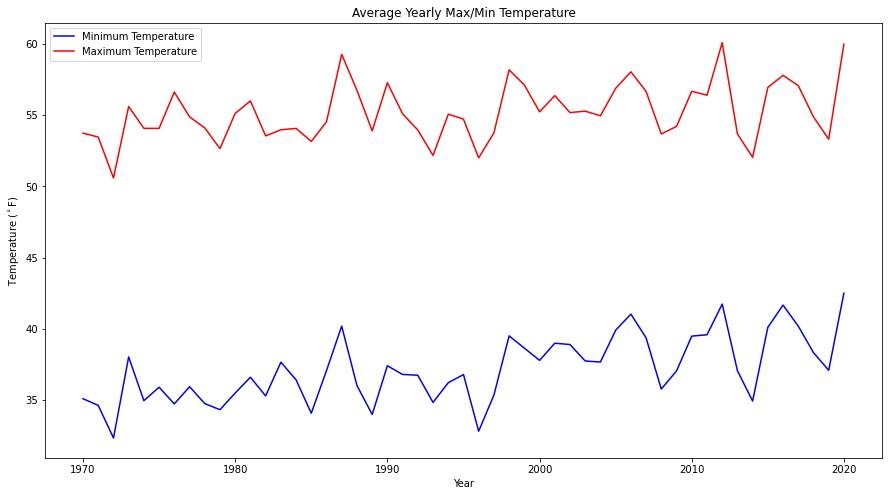

In [60]:
plt.figure(figsize=(15,8))
date = yearly_df.index.astype('O')
max_temp = yearly_df['Maximum Temperature degrees (F)']
min_temp = yearly_df['Minimum Temperature degrees (F)']

plt.xlabel("Year")
plt.ylabel("Temperature ($^\circ$F)")
plt.title("Average Yearly Max/Min Temperature")
plt.plot(date, min_temp, label="Minimum Temperature", color="blue")
plt.plot(date, max_temp, label="Maximum Temperature", color='red')
plt.legend()

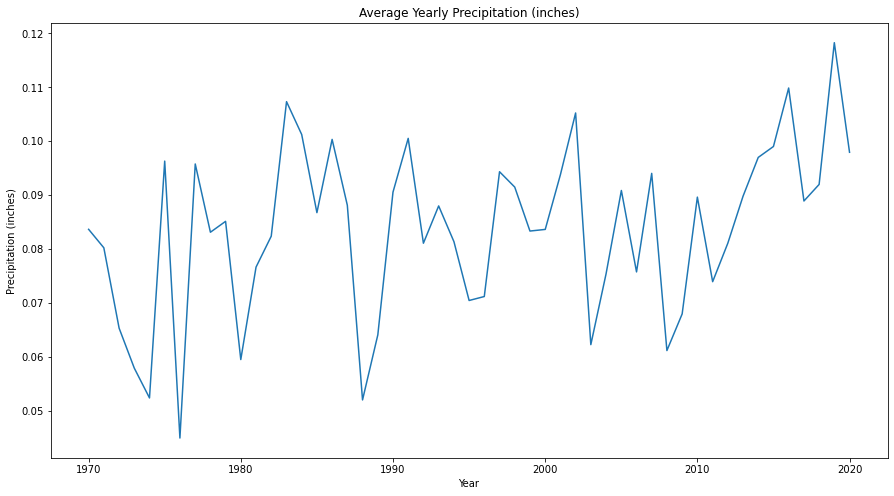

In [61]:
plt.figure(figsize=(15,8))
precip = yearly_df["Precipitation (inches)"]

plt.title("Average Yearly Precipitation (inches)")
plt.xlabel("Year")
plt.ylabel("Precipitation (inches)")
plt.plot(date, precip)

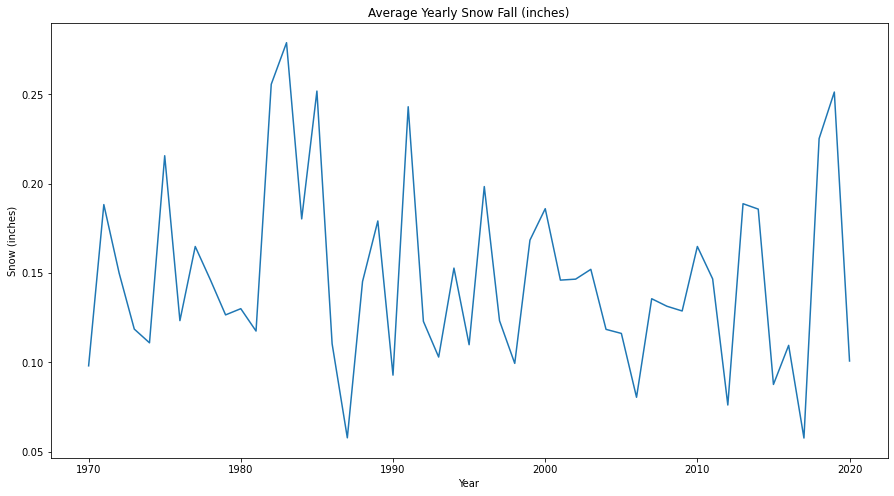

In [62]:
plt.figure(figsize=(15,8))
snow = yearly_df["Snow (inches)"]

plt.title("Average Yearly Snow Fall (inches)")
plt.xlabel("Year")
plt.ylabel("Snow (inches)")
plt.plot(date, snow)

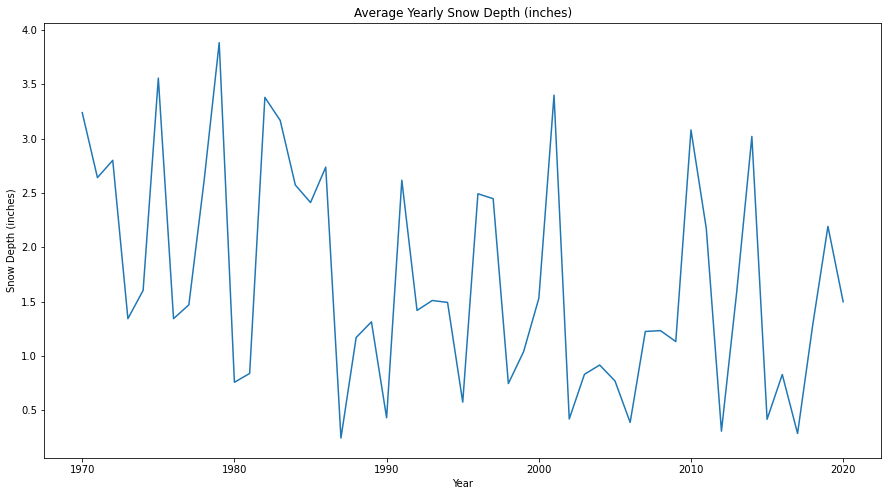

In [63]:
plt.figure(figsize=(15,8))
snow_depth = yearly_df["Snow Depth (inches)"]

plt.title("Average Yearly Snow Depth (inches)")
plt.xlabel("Year")
plt.ylabel("Snow Depth (inches)")
plt.plot(date, snow_depth)